<a href="https://colab.research.google.com/github/mythogenesys/Andrew-NG-DL-practises/blob/main/Copy_of_fixed_eeg_generalization_refactored_version_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================================================================
#      FINAL & VERIFIED: STPC EEG Research Hub (All Phases)
# ==============================================================================
# This notebook runs all three phases of the EEG study using the new,
# refactored `run_training.py` and `run_validation.py` scripts. It includes
# all necessary environment and library fixes for reproducibility on Colab.
# ==============================================================================
import os
from google.colab import drive
from IPython.display import Image, display

# ---
# [Step 1/3] SETUP: Mount Drive & Navigate to Project
# ---
print("--- [Step 1/3] Setting up the environment ---")
drive.mount('/content/drive')
PROJECT_DIR = "/content/stpc-eeg"
if not os.path.exists(PROJECT_DIR):
    print("Cloning repository...")
    !git clone -q https://github.com/Mohan-CAS-and-hackathons/stpc-eeg.git {PROJECT_DIR}
os.chdir(PROJECT_DIR)
print(f"✅ Current directory: {os.getcwd()}")
print("Pulling latest changes from repository...")
!git pull -q



--- [Step 1/3] Setting up the environment ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning repository...
✅ Current directory: /content/stpc-eeg
Pulling latest changes from repository...


In [ ]:
import os
os.chdir("/content/")
print(os.getcwd())


/content


In [ ]:
!rm -rf stpc-eeg

In [ ]:
!pwd

/content/stpc-eeg


In [ ]:
# ---
# [Step 2/3] ENVIRONMENT & TRAINING: Install dependencies and train all models
# ---
print("\n--- [Step 2/3] Installing dependencies and training EEG models ---")



# Now install all other requirements
print("Installing other required packages...")
!pip install -q -r requirements.txt


# # First, install the stable wfdb version to prevent any conflicts
# print("Installing a known-stable version of wfdb...")
# !pip uninstall -y wfdb
# !pip install --upgrade -q wfdb





--- [Step 2/3] Installing dependencies and training EEG models ---
Installing other required packages...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 135.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 127.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.

In [ ]:
# --- Define All Necessary Paths ---
DRIVE_BASE_PATH = '/content/drive/MyDrive/stpc-eeg/'
DATA_DIR_EEG = os.path.join(DRIVE_BASE_PATH, 'data/chb-mit-scalp-eeg-database-1.0.0')
MODEL_DIR = os.path.join(DRIVE_BASE_PATH, 'models')
RESULTS_DIR = os.path.join(DRIVE_BASE_PATH, 'results')
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# --- Model Paths ---
MODEL_PATH_EEG_BASELINE = os.path.join(MODEL_DIR, 'eeg_denoiser_baseline_refactored.pth')
MODEL_PATH_EEG_SPATIAL = os.path.join(MODEL_DIR, 'eeg_denoiser_spatial_refactored.pth')
MODEL_PATH_EEG_FREQ = os.path.join(MODEL_DIR, 'eeg_denoiser_frequency_refactored.pth')
MODEL_PATH_EEG_SS = os.path.join(MODEL_DIR, 'eeg_denoiser_self_supervised_refactored.pth')

# --- Train EEG Models Sequentially ---
print("\n--- Training EEG Baseline Model (Phase 1) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type baseline \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_BASELINE}" --epochs 10

print("\n--- Training EEG Spatial Model (Phase 1) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type spatial \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_SPATIAL}" --epochs 10




--- Training EEG Baseline Model (Phase 1) ---
--- Starting EEG Training: baseline ---
Scanning for common channels:   0% 0/7 [00:00<?, ?it/s]/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning for common channels:  14% 1/7 [00:01<00:06,  1.07s/it]/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning for common channels:  29% 2/7 [00:01<00:04,  1.19it/s]/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning for co

In [ ]:
print("\n--- Training EEG Frequency Model (Phase 2) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type frequency \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_FREQ}" --epochs 10

print("\n--- Training EEG Self-Supervised Model (Phase 3) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type self_supervised \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_SS}" --epochs 20

print("\n✅ All EEG model training complete!")





--- Training EEG Frequency Model (Phase 2) ---
--- Starting EEG Training: frequency ---
Scanning for common channels:   0% 0/7 [00:00<?, ?it/s]/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning for common channels:  14% 1/7 [00:00<00:02,  2.47it/s]/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/stpc-eeg/src/stpc/utils/eeg_utils.py:25: RuntimeWarning: Channel na

In [ ]:
print("\n\n--- [1/3] Validating Phase 1: Spatio-temporal Plausibility ---")
OUTPUT_VIDEO_PATH = os.path.join(RESULTS_DIR, 'phase1_spatial_comparison_refactored.mp4')
TEST_FILE_SPATIAL = os.path.join(DATA_DIR_EEG, "chb01/chb01_03.edf")
!python3 src/experiments/run_validation.py eeg \
    --eeg_experiment_type "spatial" \
    --data_dir "{DATA_DIR_EEG}" \
    --baseline_model_path "{MODEL_PATH_EEG_BASELINE}" \
    --spatial_model_path "{MODEL_PATH_EEG_SPATIAL}" \
    --test_file_path "{TEST_FILE_SPATIAL}" \
    --output_path "{OUTPUT_VIDEO_PATH}"





--- [1/3] Validating Phase 1: Spatio-temporal Plausibility ---
2025-09-29 04:04:42.797756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759118682.820681   19251 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759118682.826716   19251 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759118682.842943   19251 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759118682.842970   19251 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759118682



--- [2/3] Validating Phase 2: Frequency-Specific Preservation ---
2025-09-29 04:07:25.326043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759118845.361058   19968 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759118845.371070   19968 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759118845.395550   19968 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759118845.395594   19968 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759118

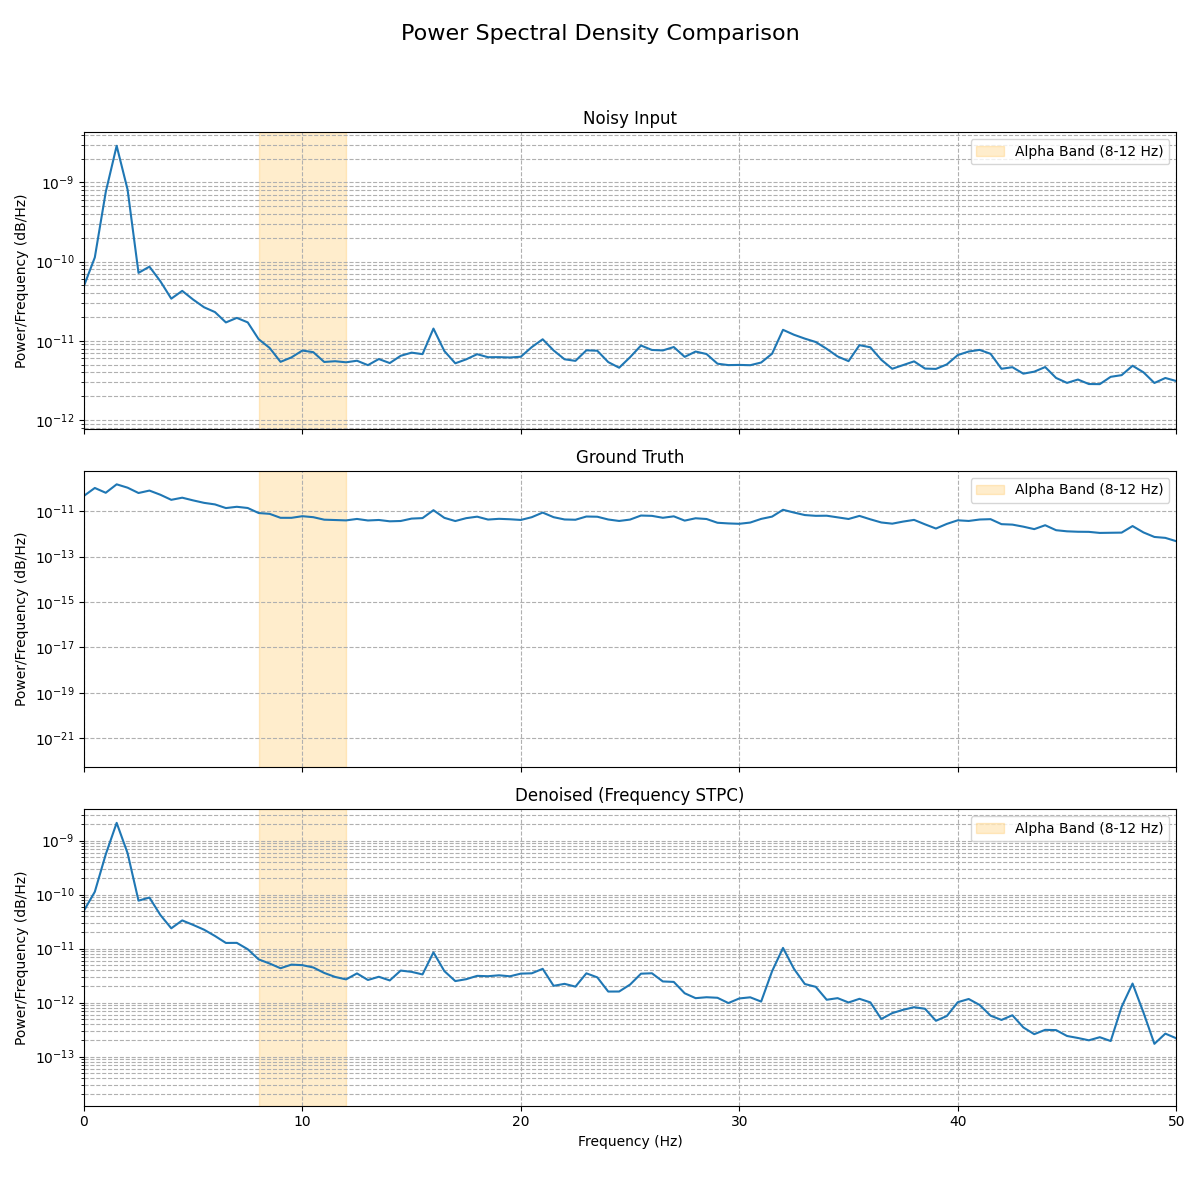

In [ ]:
# --- Phase 2: Frequency Validation ---
print("\n\n--- [2/3] Validating Phase 2: Frequency-Specific Preservation ---")
OUTPUT_PSD_PATH = os.path.join(RESULTS_DIR, 'phase2_frequency_comparison_refactored.png')
TEST_FILE_FREQ = os.path.join(DATA_DIR_EEG, "chb01/chb01_01.edf")
!python3 src/experiments/run_validation.py eeg \
    --eeg_experiment_type "frequency" \
    --data_dir "{DATA_DIR_EEG}" \
    --frequency_model_path "{MODEL_PATH_EEG_FREQ}" \
    --test_file_path "{TEST_FILE_FREQ}" \
    --output_path "{OUTPUT_PSD_PATH}"
if os.path.exists(OUTPUT_PSD_PATH): display(Image(filename=OUTPUT_PSD_PATH))





--- [3/3] Validating Phase 3: Self-Supervised Representation Learning ---
2025-09-29 04:07:50.238044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759118870.269924   20091 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759118870.280847   20091 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759118870.304804   20091 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759118870.304837   20091 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00

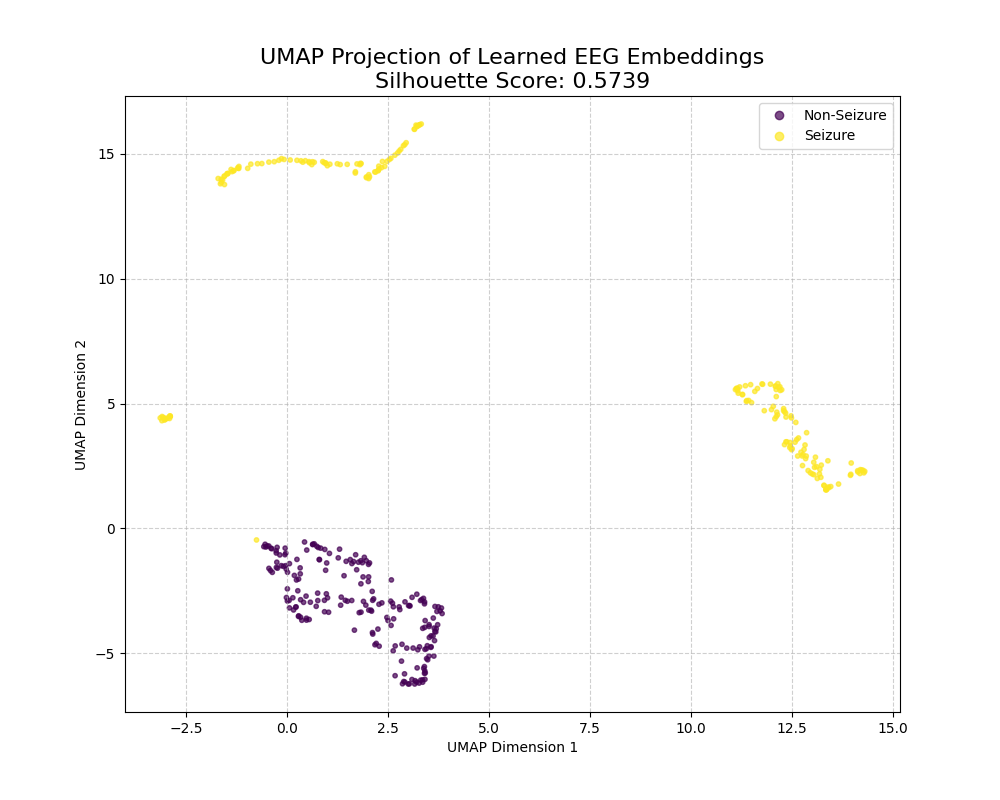



✅ All validations complete!


In [ ]:
# --- Phase 3: Self-Supervised Validation ---
print("\n\n--- [3/3] Validating Phase 3: Self-Supervised Representation Learning ---")
OUTPUT_UMAP_PATH = os.path.join(RESULTS_DIR, 'phase3_embedding_comparison_refactored.png')
!python3 src/experiments/run_validation.py eeg \
    --eeg_experiment_type "self_supervised" \
    --data_dir "{DATA_DIR_EEG}" \
    --self_supervised_model_path "{MODEL_PATH_EEG_SS}" \
    --output_path "{OUTPUT_UMAP_PATH}"
if os.path.exists(OUTPUT_UMAP_PATH): display(Image(filename=OUTPUT_UMAP_PATH))

print("\n\n✅ All validations complete!")